In [1]:
import pandas as pd

# Dados básicos
anos = [2020, 2021, 2022, 2023, 2024]
faturamentos = [8500000, 7450000, 6800000, 8000500, 8500000]
percentuais_custo = [0.82, 0.78, 0.85, 0.775, 0.769]

# Distribuição dos custos
distribuicao_custos = {
    'Materiais': 0.50,
    'Mão de Obra': 0.30,
    'Projetos e Taxas': 0.05,
    'Imprevistos': 0.05
}

# Função para calcular os dados ano a ano
def calcular_dados_ano(faturamento, percentual_custo):
    custo_total = faturamento * percentual_custo
    custos = {k: custo_total * v for k, v in distribuicao_custos.items()}
    
    # Tributos
    iss = faturamento * 0.05 * (1 - 0.40)  # 40% de abatimento
    pis_cofins = faturamento * 0.0935  # PIS 1.65% + COFINS 7.6%
    credito_pis_cofins = custos['Materiais'] * 0.0935
    pis_cofins_liquido = pis_cofins - credito_pis_cofins
    
    lucro_real = faturamento - custo_total - iss - pis_cofins_liquido
    
    # IRPJ
    irpj_base = lucro_real
    irpj_normal = irpj_base * 0.15
    irpj_adicional = max(0, irpj_base - 240000) * 0.10
    irpj_total = irpj_normal + irpj_adicional

    # CSLL
    csll = lucro_real * 0.09
    
    # Lucro líquido
    lucro_liquido = lucro_real - irpj_total - csll
    
    return {
        'Faturamento': faturamento,
        'Custo Total': custo_total,
        'Materiais': custos['Materiais'],
        'Mão de Obra': custos['Mão de Obra'],
        'Projetos e Taxas': custos['Projetos e Taxas'],
        'Imprevistos': custos['Imprevistos'],
        'ISS': iss,
        'PIS/COFINS Líquido': pis_cofins_liquido,
        'Lucro Antes IRPJ/CSLL': lucro_real,
        'IRPJ': irpj_total,
        'CSLL': csll,
        'Lucro Líquido': lucro_liquido
    }

# Construção do DataFrame
dados = [calcular_dados_ano(f, p) for f, p in zip(faturamentos, percentuais_custo)]
df = pd.DataFrame(dados, index=anos)
df.index.name = 'Ano'

# Exibir o DataFrame formatado
pd.options.display.float_format = 'R${:,.2f}'.format
display(df)


,Faturamento,Custo Total,Materiais,Mão de Obra,Projetos e Taxas,Imprevistos,ISS,PIS/COFINS Líquido,Lucro Antes IRPJ/CSLL,IRPJ,CSLL,Lucro Líquido
Ano,,,,,,,,,,,,
2020,8500000,"R$6,970,000.00","R$3,485,000.00","R$2,091,000.00","R$348,500.00","R$348,500.00","R$255,000.00","R$468,902.50","R$806,097.50","R$177,524.38","R$72,548.77","R$556,024.35"
2021,7450000,"R$5,811,000.00","R$2,905,500.00","R$1,743,300.00","R$290,550.00","R$290,550.00","R$223,500.00","R$424,910.75","R$990,589.25","R$223,647.31","R$89,153.03","R$677,788.91"
2022,6800000,"R$5,780,000.00","R$2,890,000.00","R$1,734,000.00","R$289,000.00","R$289,000.00","R$204,000.00","R$365,585.00","R$450,415.00","R$88,603.75","R$40,537.35","R$321,273.90"
2023,8000500,"R$6,200,387.50","R$3,100,193.75","R$1,860,116.25","R$310,019.38","R$310,019.38","R$240,015.00","R$458,178.63","R$1,101,918.87","R$251,479.72","R$99,172.70","R$751,266.45"
2024,8500000,"R$6,536,500.00","R$3,268,250.00","R$1,960,950.00","R$326,825.00","R$326,825.00","R$255,000.00","R$489,168.62","R$1,219,331.38","R$280,832.84","R$109,739.82","R$828,758.71"


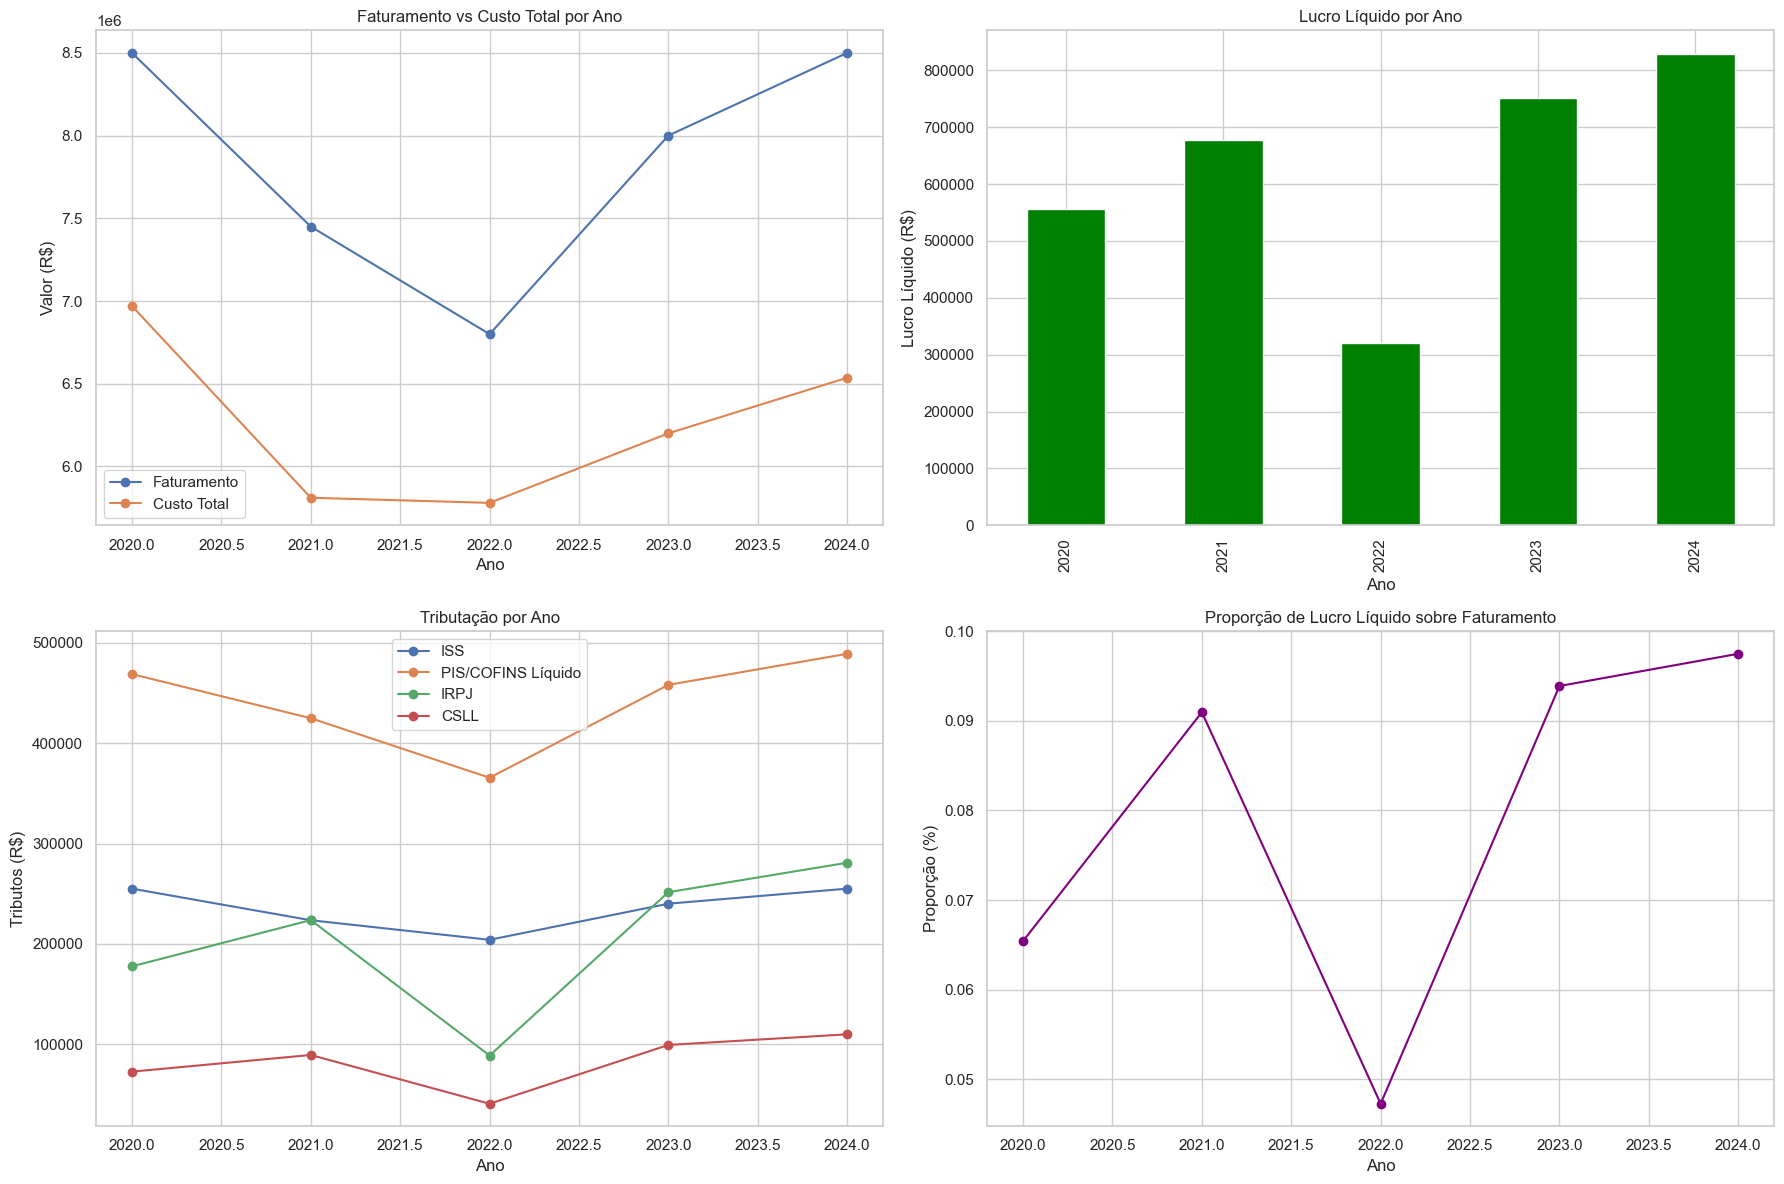

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações visuais
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# Dados simulados conforme o script anterior
anos = [2020, 2021, 2022, 2023, 2024]
faturamentos = [8500000, 7450000, 6800000, 8000500, 8500000]
percentuais_custo = [0.82, 0.78, 0.85, 0.775, 0.769]
distribuicao_custos = {'Materiais': 0.50, 'Mão de Obra': 0.30, 'Projetos e Taxas': 0.05, 'Imprevistos': 0.05}

def calcular_dados_ano(faturamento, percentual_custo):
    custo_total = faturamento * percentual_custo
    custos = {k: custo_total * v for k, v in distribuicao_custos.items()}
    iss = faturamento * 0.05 * (1 - 0.40)
    pis_cofins = faturamento * 0.0935
    credito_pis_cofins = custos['Materiais'] * 0.0935
    pis_cofins_liquido = pis_cofins - credito_pis_cofins
    lucro_real = faturamento - custo_total - iss - pis_cofins_liquido
    irpj_normal = lucro_real * 0.15
    irpj_adicional = max(0, lucro_real - 240000) * 0.10
    irpj_total = irpj_normal + irpj_adicional
    csll = lucro_real * 0.09
    lucro_liquido = lucro_real - irpj_total - csll

    return {
        'Faturamento': faturamento,
        'Custo Total': custo_total,
        'Lucro Líquido': lucro_liquido,
        'ISS': iss,
        'PIS/COFINS Líquido': pis_cofins_liquido,
        'IRPJ': irpj_total,
        'CSLL': csll
    }

dados = [calcular_dados_ano(f, p) for f, p in zip(faturamentos, percentuais_custo)]
df = pd.DataFrame(dados, index=anos)
df.index.name = 'Ano'

# Gráficos
fig, axs = plt.subplots(2, 2, figsize=(18, 12))

# Faturamento e Custo Total
df[['Faturamento', 'Custo Total']].plot(ax=axs[0, 0], marker='o')
axs[0, 0].set_title("Faturamento vs Custo Total por Ano")
axs[0, 0].set_ylabel("Valor (R$)")

# Lucro Líquido
df['Lucro Líquido'].plot(ax=axs[0, 1], kind='bar', color='green')
axs[0, 1].set_title("Lucro Líquido por Ano")
axs[0, 1].set_ylabel("Lucro Líquido (R$)")

# Tributos Individuais
df[['ISS', 'PIS/COFINS Líquido', 'IRPJ', 'CSLL']].plot(ax=axs[1, 0], marker='o')
axs[1, 0].set_title("Tributação por Ano")
axs[1, 0].set_ylabel("Tributos (R$)")

# Proporção de Lucro sobre Faturamento
(df['Lucro Líquido'] / df['Faturamento']).plot(ax=axs[1, 1], kind='line', marker='o', color='purple')
axs[1, 1].set_title("Proporção de Lucro Líquido sobre Faturamento")
axs[1, 1].set_ylabel("Proporção (%)")

plt.tight_layout()
plt.show()


📈 Gráfico 1: Faturamento vs Custo Total
Mostra como o custo acompanha o faturamento ao longo dos anos. Em 2022, mesmo com menor faturamento, o custo foi proporcionalmente maior.

💰 Gráfico 2: Lucro Líquido por Ano
O lucro líquido foi mais baixo em 2022, refletindo o alto custo. Em 2024, observamos recuperação, mas ainda sob forte carga tributária.

🧾 Gráfico 3: Tributos por Ano
O ISS é relativamente estável, mas PIS/COFINS e IRPJ/CSLL variam bastante conforme o lucro real. O IRPJ adicional impacta mais nos anos de maior lucro.

📊 Gráfico 4: Proporção de Lucro Líquido sobre Faturamento
Indica a eficiência do negócio. Em 2022 a margem foi menor, o que alerta para revisão de custos ou produtividade.